In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
peaks = pd.read_csv('./data/df_peaks.csv', index_col=0)
curves = pd.read_csv('./data/df_curves.csv', index_col=0)

In [29]:
peaks['id'] = peaks['id'].astype(int)

In [30]:
curves.head(10)

,id_peak,curve_type,0,1,2,3,4,5,6,7,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,peak,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,noise,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,...,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000
2,0,bl,3.322727,3.318565,3.314286,3.309891,3.305379,3.300751,3.296008,3.291149,...,-4.078299,-4.088037,-4.097703,-4.107294,-4.116810,-4.126250,-4.135613,-4.144898,-4.154103,-4.163229
3,0,fd,-0.004104,-0.004221,-0.004337,-0.004454,-0.004570,-0.004686,-0.004801,-0.004917,...,-0.009775,-0.009702,-0.009629,-0.009554,-0.009478,-0.009402,-0.009324,-0.009245,-0.009166,-0.009085
4,0,sd,-0.000117,-0.000117,-0.000116,-0.000116,-0.000116,-0.000116,-0.000116,-0.000115,...,0.000072,0.000073,0.000074,0.000075,0.000076,0.000077,0.000078,0.000079,0.000080,0.000081
5,1,peak,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1,noise,-0.119033,-0.510984,-0.260803,0.274576,-0.461498,0.395318,0.673879,-0.664066,...,1.010433,0.886648,-1.103310,0.935024,-0.793911,-0.092673,1.202131,0.174505,-0.180903,0.153881
7,1,bl,-1.390860,-1.389106,-1.387241,-1.385267,-1.383187,-1.381001,-1.378714,-1.376326,...,-2.719937,-2.734998,-2.750099,-2.765236,-2.780408,-2.795612,-2.810847,-2.826111,-2.841400,-2.856714
8,1,fd,0.001698,0.001810,0.001920,0.002028,0.002134,0.002237,0.002338,0.002437,...,-0.015041,-0.015081,-0.015119,-0.015155,-0.015189,-0.015220,-0.015250,-0.015277,-0.015302,-0.015325
9,1,sd,0.000113,0.000111,0.000109,0.000107,0.000105,0.000102,0.000100,0.000098,...,-0.000041,-0.000039,-0.000037,-0.000035,-0.000033,-0.000030,-0.000028,-0.000026,-0.000024,-0.000022


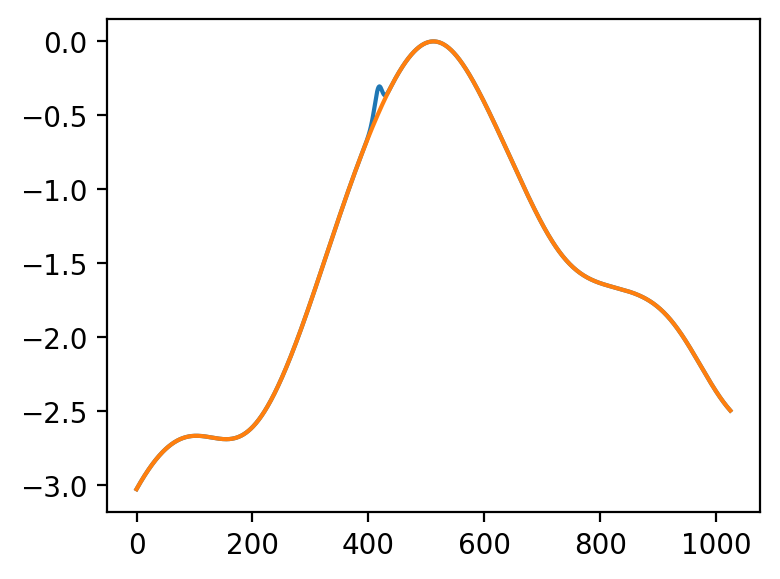

In [31]:
id_peak = 600
line = curves.loc[(curves['id_peak'] == id_peak)]
peak = line.iloc[0, 2:].values
noise = line.iloc[1, 2:].values
baseline = line.iloc[2, 2:].values

fig, ax = plt.subplots(1, 1, figsize=(4, 3), tight_layout=True)
ax.plot(baseline + peak + noise)
ax.plot(baseline)

### No noise - single peak
Отбор данных на первом этапе - без шума и один пик на кривой

In [37]:
target_data_full = peaks.loc[(peaks['noise_coef'] == 0) & ( peaks['height'] > 0)]
target = target_data_full.loc[:, ['id', 'height', 'position']]

In [48]:
target.head(3)

,id,height,position
6,6,0.310459,655.636715
12,12,0.910161,941.423275
18,18,1.290232,940.368842


In [54]:
ids = target['id'].values
hold_lines = ['peak', 'bl']

In [56]:
selected_curves = curves.query("id_peak in @ids").query('curve_type in @hold_lines')

In [60]:
data_curves = selected_curves.values[::2, 2:] + selected_curves.values[1::2, 2:]

In [62]:
data_curves.shape, target.shape

((9992, 1025), (9992, 3))

In [68]:
clean_target = target.iloc[:, 1:].values

In [70]:
np.save('./data/no_noise_single_peak_data', data_curves)
np.save('./data/no_noise_single_peak_target', clean_target)